***

Name: Dr D  
Class: Pattern Recognition Spring 2018

# Won't You Be my Neighbor?

By Matthew Williams

## Problem Description

Using the sklearn digits dataset, train a nearest neighbor classifier and use it to classify your own writing samples.

## Solution Method

I drew my own digits using GIMP, a free piece of graphic software for most systems. I used sklearn, skimage, and numpy to manipulate the data held in these images and matplotlib to draw them.  

## Input

Here I train the classifier and import my own writing samples

In [338]:
from sklearn.datasets import load_digits
from sklearn import model_selection
from sklearn.neighbors import DistanceMetric, KNeighborsClassifier
from skimage import data
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
X, y = load_digits(return_X_y = True)
#print(X.shape)
#print(y.shape)
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
trainX, testX, trainy, testy = model_selection.train_test_split(X,y)
#print(trainX.shape,trainy.shape,testX.shape,testy.shape)
neigh.fit(trainX,trainy)
print("Score on classifying the testing part of the original data set: " + str(neigh.score(testX,testy)))
# wow! Pretty good classifier!


Score on classifying the testing part of the original data set: 0.98


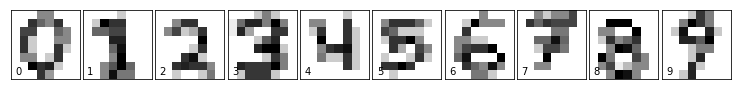

<class 'numpy.float64'>
<class 'numpy.float64'>


In [339]:
my0 = io.imread("0.png",as_grey=True)
def f (x):
    return int(round(abs(x-1)*15))

f = np.vectorize(f)
my0 = f(my0)

fig = plt.figure(figsize=(10, 5))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=.5, hspace=0.05, wspace=0.05)
myNums = np.ndarray((0,0))

for i in range(0,10):
    img = io.imread(str(i) + ".png", as_grey=True)
    img = f(img)
    myNums = np.append(myNums,img)
    ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
    ax.imshow(img, cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(i))
plt.show()

# My handdrawn numbers
myNums = np.reshape(myNums,(10,8,8))
print(type(myNums[0][0][0]))
print(type(trainX[0][0]))

## Analysis/Results

Here I use the classifier to predict the class of each of my own writing samples and compare it to the nearest neighbor, as well as an average of the three closest neighbors, which I included since the classifier makes decisions based off of three closest neighbors. Finally, I take a difference between my handwriting and the nearest neighbor - more because it is pretty than because it has much utility. 

[0 2 2 3 9 5 6 7 9 9]


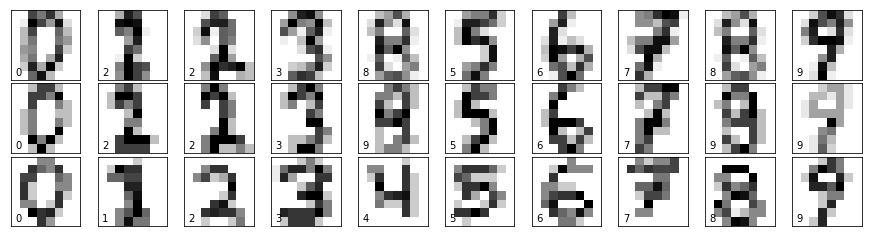

In [340]:
predictions = neigh.predict(np.reshape(myNums,(10,64)))
print(predictions)
neighbors = neigh.kneighbors(np.reshape(myNums,(10,64)),1)
threeneighbors = neigh.kneighbors(np.reshape(myNums,(10,64)),3,return_distance=False)

def average(*args):
    sum = 0
    for arg in args:
        sum += arg
    return int(round(sum / len(args)))
averageV = np.vectorize(average)

mneighs = np.ndarray((10,64))

for i, a in enumerate(threeneighbors):
    for b in a:
        mneighs[i] += trainX[b] / len(threeneighbors)

for i in range(0,10):
    for j in range(0,64):
        mneighs[i][j] = int(mneighs[i][j])

fig = plt.figure(figsize=(12, 12))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=.25, hspace=0.05, wspace=0.05)

for j, i in enumerate(neighbors[1]):
    ax = fig.add_subplot(3,10, j+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(trainX[i],(8,8)), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(trainy[i][0]))    
    ax = fig.add_subplot(3,10, j+11, xticks=[], yticks=[])
    ax.text(0, 7, str(predictions[j]))    
    ax.imshow(np.reshape(mneighs[j],(8,8)), cmap=plt.cm.binary, interpolation='nearest')
    ax = fig.add_subplot(3,10, j+21, xticks=[], yticks=[])
    ax.imshow(myNums[j], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(j))
plt.show()
    
    
# nearest neighbor is show on top,
# then an average of the three closest neighbors (which is what the classifier is actually deciding off of), 
# and the hand-drawn number on bottom

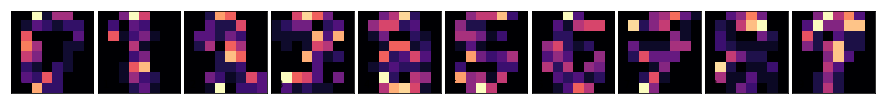

In [341]:
def cleanup(x):
    return int(round(abs(x)))
cleanupArray = np.vectorize(cleanup)


diff = np.ndarray((10,64))
for i in range(0,10):
    diff[i] = np.reshape(myNums[i],(64)) - trainX[neighbors[1][i]]
    diff[i] = cleanupArray(diff[i])

    
fig = plt.figure(figsize=(12, 12))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=.25, hspace=0.05, wspace=0.05)

for i in range(0,10):
    ax = fig.add_subplot(1,10, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(diff[i],(8,8)), cmap="magma")
    ax.text(0, 7, str(i))
plt.show()
# Here I show the difference between my numbers and the nearest neighbor to them.

## Discussion

Really the classification was fairly trivial, most of the difficulty lay in familiarizing myself with Python libraries for image manipulation and the different ways to group data (tuples, arrays, ndarrays, etc). I would like to try to compare my writing smaple to its nearest neighbor which belongs to the correct class, but I am unsure how to do that in any reasonably non-bruteforce way. 